#Real-World Big Data Analysis

## Analyzing Electricity Consumption Patterns and Promoting Renewable Energy in Sri Lanka

This notebook explores electricity consumption and export patterns using smart meter data from Sri Lanka. The analysis aims to understand current usage trends, identify factors influencing energy export (potentially from renewable sources like solar), and provide data-driven insights that can inform strategies for promoting renewable energy adoption and optimizing energy management within the country.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#upload the csv file
df = pd.read_csv('/content/drive/MyDrive/smart_6hour_4.csv', low_memory=False)
df.head()

,household_ID,BRANCH,DEPOT,substation_ID,SUB_TYPE,E_BILLING,EXPORT,DATE,TIME,TOTAL_IMPORT (kWh),...,TR1_TOTAL_EXPORT - PV1 (kWh),TR2_TOTAL_EXPORT - PV1 (kWh),TR3_TOTAL_EXPORT - PV1 (kWh),PHASE_A_CURRENT (A),PHASE_A_VOLTAGE (V),FREQUENCY (Hz),PHASE_B_CURRENT (A),PHASE_B_VOLTAGE (V),PHASE_C_CURRENT (A),PHASE_C_VOLTAGE (V)
0,ID2000,MORATUWA,MORATUWA SOUTH C.S.C,sub446,Anteleco - DLMS SinglePhase,False,False,2024-04-02,05:49:27,2179.594,...,0.0,0.0,0.0,1.1501,223.7001,49.9801,NaN,NaN,NaN,NaN
1,ID5371,NUGEGODA,NUGEGODA,sub592,Anteleco - DLMS SinglePhase,False,False,2024-04-02,01:03:50,1221.699,...,0.0,0.0,0.0,0.0000,239.1001,50.1000,NaN,NaN,NaN,NaN
2,ID0681,NUGEGODA,MAHARAGAMA,sub671,Anteleco - DLMS SinglePhase,False,False,2024-04-02,01:04:48,1740.479,...,0.0,0.0,0.0,0.4400,230.3000,49.9200,NaN,NaN,NaN,NaN
3,ID5350,NUGEGODA,NUGEGODA,sub606,Anteleco - DLMS SinglePhase,False,False,2024-04-02,01:05:37,0.326,...,0.0,0.0,0.0,0.0000,231.1001,49.9500,NaN,NaN,NaN,NaN
4,ID5351,NUGEGODA,NUGEGODA,sub593,Anteleco - DLMS SinglePhase,False,False,2024-04-02,01:06:40,242.493,...,0.0,0.0,0.0,0.0000,239.0000,50.1300,NaN,NaN,NaN,NaN


In [6]:
# Get information about the DataFrame
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680674 entries, 0 to 680673
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   household_ID                  680674 non-null  object 
 1   BRANCH                        680674 non-null  object 
 2   DEPOT                         680674 non-null  object 
 3   substation_ID                 680674 non-null  object 
 4   SUB_TYPE                      680674 non-null  object 
 5   E_BILLING                     680674 non-null  bool   
 6   EXPORT                        680674 non-null  bool   
 7   DATE                          680674 non-null  object 
 8   TIME                          680674 non-null  object 
 9   TOTAL_IMPORT (kWh)            680674 non-null  object 
 10  TOTAL_EXPORT (kWh)            680674 non-null  float64
 11  TOTAL_IMPORT - PV1 (kWh)      680674 non-null  float64
 12  TOTAL_EXPORT - PV1 (kWh)   

In [7]:
# Get descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe(include='all')) # Include all dtypes for a comprehensive overview


Descriptive Statistics:


,household_ID,BRANCH,DEPOT,substation_ID,SUB_TYPE,E_BILLING,EXPORT,DATE,TIME,TOTAL_IMPORT (kWh),...,TR1_TOTAL_EXPORT - PV1 (kWh),TR2_TOTAL_EXPORT - PV1 (kWh),TR3_TOTAL_EXPORT - PV1 (kWh),PHASE_A_CURRENT (A),PHASE_A_VOLTAGE (V),FREQUENCY (Hz),PHASE_B_CURRENT (A),PHASE_B_VOLTAGE (V),PHASE_C_CURRENT (A),PHASE_C_VOLTAGE (V)
count,680674,680674,680674,680674,680674,680674,680674,680674,680674,680674,...,680674.000000,680674.000000,6.806740e+05,680674.000000,680674.000000,680674.000000,92217.000000,92217.000000,92217.000000,92217.000000
unique,2929,7,23,814,4,2,2,148,37882,603275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID4505,MORATUWA,MORATUWA NORTH C.S.C,sub522,Anteleco - DLMS SinglePhase,False,False,2024-09-01,01:14:08,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,503,490419,172288,9082,583906,643818,561541,9799,235,1577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2735.323140,6.081680,2.665237e+01,0.948521,232.850297,50.063558,1.376338,233.042232,1.371577,233.116868
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10260.607901,816.429909,8.802565e+03,2.205797,6.686848,0.087534,3.957434,16.724367,4.061167,12.876652
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,-62.795000,0.000000,49.450000,-60.900000,0.000000,-62.680000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.179000,230.000000,50.010000,0.056000,231.100100,0.051000,230.700100
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.557000,233.500000,50.070000,0.435000,234.700100,0.457000,234.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,1.112000,236.300000,50.130000,1.292000,237.600100,1.273100,237.400000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680674 entries, 0 to 680673
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   household_ID                  680674 non-null  object 
 1   BRANCH                        680674 non-null  object 
 2   DEPOT                         680674 non-null  object 
 3   substation_ID                 680674 non-null  object 
 4   SUB_TYPE                      680674 non-null  object 
 5   E_BILLING                     680674 non-null  bool   
 6   EXPORT                        680674 non-null  bool   
 7   DATE                          680674 non-null  object 
 8   TIME                          680674 non-null  object 
 9   TOTAL_IMPORT (kWh)            680674 non-null  object 
 10  TOTAL_EXPORT (kWh)            680674 non-null  float64
 11  TOTAL_IMPORT - PV1 (kWh)      680674 non-null  float64
 12  TOTAL_EXPORT - PV1 (kWh)      680674 non-nul

In [9]:
df.describe()

,TOTAL_EXPORT (kWh),TOTAL_IMPORT - PV1 (kWh),TOTAL_EXPORT - PV1 (kWh),TR1_TOTAL_IMPORT (kWh),TR2_TOTAL_IMPORT (kWh),TR3_TOTAL_IMPORT (kWh),TR1_TOTAL_EXPORT (kWh),TR2_TOTAL_EXPORT (kWh),TR3_TOTAL_EXPORT (kWh),TR1_TOTAL_IMPORT - PV1 (kWh),...,TR1_TOTAL_EXPORT - PV1 (kWh),TR2_TOTAL_EXPORT - PV1 (kWh),TR3_TOTAL_EXPORT - PV1 (kWh),PHASE_A_CURRENT (A),PHASE_A_VOLTAGE (V),FREQUENCY (Hz),PHASE_B_CURRENT (A),PHASE_B_VOLTAGE (V),PHASE_C_CURRENT (A),PHASE_C_VOLTAGE (V)
count,680674.000000,680674.000000,680674.000000,680674.000000,680674.000000,680674.000000,680674.000000,680674.000000,680674.000000,680674.000000,...,680674.000000,680674.000000,6.806740e+05,680674.000000,680674.000000,680674.000000,92217.000000,92217.000000,92217.000000,92217.000000
mean,2808.726207,5318.347440,2747.879790,2635.226479,1142.615829,1643.034736,2796.142976,4.394317,8.188847,2587.882606,...,2735.323140,6.081680,2.665237e+01,0.948521,232.850297,50.063558,1.376338,233.042232,1.371577,233.116868
std,10507.149087,14009.910427,10288.131084,8495.158545,2603.090826,3811.862493,10479.982245,103.257520,156.754544,8368.187911,...,10260.607901,816.429909,8.802565e+03,2.205797,6.686848,0.087534,3.957434,16.724367,4.061167,12.876652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,-62.795000,0.000000,49.450000,-60.900000,0.000000,-62.680000,0.000000
25%,0.000000,1817.966100,0.000000,856.314250,368.339500,477.227325,0.000000,0.000000,0.000000,838.659000,...,0.000000,0.000000,0.000000e+00,0.179000,230.000000,50.010000,0.056000,231.100100,0.051000,230.700100
50%,0.000000,3081.670000,0.000000,1430.690000,640.749000,883.216500,0.000000,0.000000,0.000000,1405.940000,...,0.000000,0.000000,0.000000e+00,0.557000,233.500000,50.070000,0.435000,234.700100,0.457000,234.500000
75%,0.000000,5094.919000,0.000000,2273.158000,1106.149100,1542.030000,0.000000,0.000000,0.000000,2236.983000,...,0.000000,0.000000,0.000000e+00,1.112000,236.300000,50.130000,1.292000,237.600100,1.273100,237.400000
max,205453.769000,443071.600000,205356.504100,278945.390000,71801.350000,92326.530000,205453.181000,4740.190000,6083.620000,278945.180000,...,205355.916000,385803.878000,4.192289e+06,70.242000,318.600000,50.500000,59.378000,261.000000,62.351000,257.800000


# 1. preprocessing

Step 01

In [10]:
# Ensure numeric types
df["EXPORT"] = pd.to_numeric(df["EXPORT"], errors="coerce")
df["TOTAL_IMPORT (kWh)"] = pd.to_numeric(df["TOTAL_IMPORT (kWh)"], errors="coerce")

# Combine export and import to calculate share
df["EXPORT_SHARE"] = df["EXPORT"] / (df["EXPORT"] + df["TOTAL_IMPORT (kWh)"])
df["EXPORT_SHARE"] = df["EXPORT_SHARE"].replace([np.inf, -np.inf], np.nan).fillna(0)

# Combine 'DATE' and 'TIME' to create a datetime column
df["TIMESTAMP"] = pd.to_datetime(df["DATE"] + " " + df["TIME"])

# Time bin
df["hour_bin"] = df["TIMESTAMP"].dt.hour

# Create the 'hour_bin_6' column by cutting the 'hour_bin' column
bins = [0, 6, 12, 18, 24]
labels = ["0–6", "6–12", "12–18", "18–24"]
df["hour_bin_6"] = pd.cut(df["hour_bin"], bins=bins, labels=labels, right=False, include_lowest=True)

# Extract weekday from TIMESTAMP
df["weekday"] = df["TIMESTAMP"].dt.day_name()

# Calculate Self-Consumption (estimated as Total Import - Total Export)
df["SELF_CONSUMPTION"] = df["TOTAL_IMPORT (kWh)"] - df["TOTAL_EXPORT (kWh)"]

# Create 'is_weekend' column
df["is_weekend"] = df["TIMESTAMP"].dt.dayofweek >= 5 # Saturday and Sunday are represented as 5 and 6

print("Preprocessing steps completed.")

Preprocessing steps completed.


1.1 Handle Missing Values

In [11]:
missing_counts = df.isnull().sum()
print(missing_counts)

household_ID                         0
BRANCH                               0
DEPOT                                0
substation_ID                        0
SUB_TYPE                             0
E_BILLING                            0
EXPORT                               0
DATE                                 0
TIME                                 0
TOTAL_IMPORT (kWh)                   1
TOTAL_EXPORT (kWh)                   0
TOTAL_IMPORT - PV1 (kWh)             0
TOTAL_EXPORT - PV1 (kWh)             0
TR1_TOTAL_IMPORT (kWh)               0
TR2_TOTAL_IMPORT (kWh)               0
TR3_TOTAL_IMPORT (kWh)               0
TR1_TOTAL_EXPORT (kWh)               0
TR2_TOTAL_EXPORT (kWh)               0
TR3_TOTAL_EXPORT (kWh)               0
TR1_TOTAL_IMPORT - PV1 (kWh)         0
TR2_TOTAL_IMPORT - PV1 (kWh)         0
TR3_TOTAL_IMPORT - PV1 (kWh)         0
TR1_TOTAL_EXPORT - PV1 (kWh)         0
TR2_TOTAL_EXPORT - PV1 (kWh)         0
TR3_TOTAL_EXPORT - PV1 (kWh)         0
PHASE_A_CURRENT (A)      

In [13]:
# Count missing
print("Missing values before cleaning:")
print(df.isna().sum())

# Simple fixes
# Drop rows with essential missing values (likely very few based on info())
df = df.dropna(subset=["EXPORT", "TOTAL_IMPORT (kWh)", "household_ID"])

# Identify numeric columns with missing values that should be filled with 0
numeric_cols_with_nans = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isna().any()].tolist()

# Fill missing numeric values with 0
df[numeric_cols_with_nans] = df[numeric_cols_with_nans].fillna(0)

print("\nMissing values after cleaning:")
print(df.isna().sum())

Missing values before cleaning:
household_ID                         0
BRANCH                               0
DEPOT                                0
substation_ID                        0
SUB_TYPE                             0
E_BILLING                            0
EXPORT                               0
DATE                                 0
TIME                                 0
TOTAL_IMPORT (kWh)                   0
TOTAL_EXPORT (kWh)                   0
TOTAL_IMPORT - PV1 (kWh)             0
TOTAL_EXPORT - PV1 (kWh)             0
TR1_TOTAL_IMPORT (kWh)               0
TR2_TOTAL_IMPORT (kWh)               0
TR3_TOTAL_IMPORT (kWh)               0
TR1_TOTAL_EXPORT (kWh)               0
TR2_TOTAL_EXPORT (kWh)               0
TR3_TOTAL_EXPORT (kWh)               0
TR1_TOTAL_IMPORT - PV1 (kWh)         0
TR2_TOTAL_IMPORT - PV1 (kWh)         0
TR3_TOTAL_IMPORT - PV1 (kWh)         0
TR1_TOTAL_EXPORT - PV1 (kWh)         0
TR2_TOTAL_EXPORT - PV1 (kWh)         0
TR3_TOTAL_EXPORT - PV1 (kWh)    

In [14]:
#Remove Duplicates
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

### Feature Engineering

In [15]:
import pandas as pd

# Sample raw data
data = pd.DataFrame({
    'TIMESTAMP': pd.to_datetime([
        '2025-08-01 06:15:00',
        '2025-08-02 14:30:00',
        '2025-08-03 19:45:00',
        '2025-08-04 02:00:00'
    ]),
    'EXPORT': [42, 67, 0, 88],
    'IMPORT': [31, 115, 25, 733],
    'BRANCH': ['KANDY', 'COLOMBO', 'KANDY', 'COLOMBO'],
    'DEPOT': ['EAST', 'WEST', 'EAST', 'WEST'],
    'SUBSTATION_ID': [1, 2, 1, 2],
    'E_BILLING': ['DOMESTIC', 'DOMESTIC', 'NON_DOMESTIC', 'DOMESTIC']
})

# Feature engineering
data['hour_bin'] = data['TIMESTAMP'].dt.hour // 6 * 6
data['month'] = data['TIMESTAMP'].dt.month
data['is_weekend'] = data['TIMESTAMP'].dt.dayofweek >= 5
data['EXPORT_SHARE'] = data['EXPORT'] / (data['EXPORT'] + data['IMPORT'])
data['IMPORT_EXPORT_RATIO'] = data['IMPORT'] / (data['EXPORT'] + 1)

# One-hot encoding
data = pd.get_dummies(data, columns=['BRANCH', 'DEPOT', 'SUBSTATION_ID', 'E_BILLING'])

# Display engineered data
print(data.head())

            TIMESTAMP  EXPORT  IMPORT  hour_bin  month  is_weekend  \
0 2025-08-01 06:15:00      42      31         6      8       False   
1 2025-08-02 14:30:00      67     115        12      8        True   
2 2025-08-03 19:45:00       0      25        18      8        True   
3 2025-08-04 02:00:00      88     733         0      8       False   

   EXPORT_SHARE  IMPORT_EXPORT_RATIO  BRANCH_COLOMBO  BRANCH_KANDY  \
0      0.575342             0.720930           False          True   
1      0.368132             1.691176            True         False   
2      0.000000            25.000000           False          True   
3      0.107186             8.235955            True         False   

   DEPOT_EAST  DEPOT_WEST  SUBSTATION_ID_1  SUBSTATION_ID_2  \
0        True       False             True            False   
1       False        True            False             True   
2        True       False             True            False   
3       False        True            False    

In [16]:
# Ensure numeric types (if not already done in preprocessing)
df["EXPORT"] = pd.to_numeric(df["EXPORT"], errors="coerce")
df["TOTAL_IMPORT (kWh)"] = pd.to_numeric(df["TOTAL_IMPORT (kWh)"], errors="coerce")

# Combine export and import to calculate share
df["EXPORT_SHARE"] = df["EXPORT"] / (df["EXPORT"] + df["TOTAL_IMPORT (kWh)"])
df["EXPORT_SHARE"] = df["EXPORT_SHARE"].replace([np.inf, -np.inf], np.nan).fillna(0)

# Combine 'DATE' and 'TIME' to create a datetime column
df["TIMESTAMP"] = pd.to_datetime(df["DATE"] + " " + df["TIME"])

# Time bin
df["hour_bin"] = df["TIMESTAMP"].dt.hour

# Create the 'hour_bin_6' column by cutting the 'hour_bin' column
bins = [0, 6, 12, 18, 24]
labels = ["0–6", "6–12", "12–18", "18–24"]
df["hour_bin_6"] = pd.cut(df["hour_bin"], bins=bins, labels=labels, right=False, include_lowest=True)

# Extract weekday from TIMESTAMP
df["weekday"] = df["TIMESTAMP"].dt.day_name()

# Calculate Self-Consumption (estimated as Total Import - Total Export)
df["SELF_CONSUMPTION"] = df["TOTAL_IMPORT (kWh)"] - df["TOTAL_EXPORT (kWh)"]

# Create 'is_weekend' column
df["is_weekend"] = df["TIMESTAMP"].dt.dayofweek >= 5 # Saturday and Sunday are represented as 5 and 6

print("Feature engineering completed.")

# Display the first few rows with the new features
display(df.head())

Feature engineering completed.


,household_ID,BRANCH,DEPOT,substation_ID,SUB_TYPE,E_BILLING,EXPORT,DATE,TIME,TOTAL_IMPORT (kWh),...,PHASE_B_VOLTAGE (V),PHASE_C_CURRENT (A),PHASE_C_VOLTAGE (V),EXPORT_SHARE,TIMESTAMP,hour_bin,hour_bin_6,weekday,SELF_CONSUMPTION,is_weekend
0,ID2000,MORATUWA,MORATUWA SOUTH C.S.C,sub446,Anteleco - DLMS SinglePhase,False,False,2024-04-02,05:49:27,2179.594,...,0.0,0.0,0.0,0.0,2024-04-02 05:49:27,5,0–6,Tuesday,2179.594,False
1,ID5371,NUGEGODA,NUGEGODA,sub592,Anteleco - DLMS SinglePhase,False,False,2024-04-02,01:03:50,1221.699,...,0.0,0.0,0.0,0.0,2024-04-02 01:03:50,1,0–6,Tuesday,1221.699,False
2,ID0681,NUGEGODA,MAHARAGAMA,sub671,Anteleco - DLMS SinglePhase,False,False,2024-04-02,01:04:48,1740.479,...,0.0,0.0,0.0,0.0,2024-04-02 01:04:48,1,0–6,Tuesday,1740.479,False
3,ID5350,NUGEGODA,NUGEGODA,sub606,Anteleco - DLMS SinglePhase,False,False,2024-04-02,01:05:37,0.326,...,0.0,0.0,0.0,0.0,2024-04-02 01:05:37,1,0–6,Tuesday,0.326,False
4,ID5351,NUGEGODA,NUGEGODA,sub593,Anteleco - DLMS SinglePhase,False,False,2024-04-02,01:06:40,242.493,...,0.0,0.0,0.0,0.0,2024-04-02 01:06:40,1,0–6,Tuesday,242.493,False


#Clustering (KMeans)

Step 2.

2.1 Aggregate by household (daily or total).

In [17]:
# Ensure 'TOTAL_IMPORT (kWh)' is numeric
df["TOTAL_IMPORT (kWh)"] = pd.to_numeric(df["TOTAL_IMPORT (kWh)"], errors="coerce")

agg = df.groupby("household_ID").agg(
    total_export=("EXPORT", "sum"),
    total_import=("TOTAL_IMPORT (kWh)", "sum"),
    avg_export=("EXPORT", "mean"),
    avg_import=("TOTAL_IMPORT (kWh)", "mean")
).reset_index()

2.2 Scale features.

In [18]:
from sklearn.preprocessing import StandardScaler

X = agg[["avg_export", "avg_import"]]
scaler = StandardScaler() # Instantiate the scaler
X_scaled = scaler.fit_transform(X)

2.3 Run KMeans.

In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42, n_init=20)
agg["cluster"] = km.fit_predict(X_scaled)

2.4 Interpret results.

In [20]:
agg.groupby("cluster")[["avg_export","avg_import"]].mean()

,avg_export,avg_import
cluster,,
0,0.001696,3752.875503
1,0.179126,159621.161559
2,0.985956,8412.527383


#Regression / Forecasting

Setep 3

In [21]:
daily = df.groupby("DATE")["TOTAL_IMPORT (kWh)"].sum().reset_index()
daily["DATE"] = pd.to_datetime(daily["DATE"])
daily = daily.set_index("DATE")

In [22]:
import pandas as pd

# Aggregate daily IMPORT (or EXPORT)
daily = df.groupby("DATE")["TOTAL_IMPORT (kWh)"].sum().reset_index()
daily["DATE"] = pd.to_datetime(daily["DATE"])
daily = daily.set_index("DATE")

In [23]:
train_size = int(len(daily) * 0.8)
train, test = daily.iloc[:train_size], daily.iloc[train_size:]

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Simple ARIMA model (p,d,q can be tuned)
model = ARIMA(train["TOTAL_IMPORT (kWh)"], order=(2,1,2))
model_fit = model.fit()

# Forecast same length as test
forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [25]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(test["TOTAL_IMPORT (kWh)"], forecast)
mape = mean_absolute_percentage_error(test["TOTAL_IMPORT (kWh)"], forecast)

print("ARIMA MAE:", mae)
print("ARIMA MAPE:", mape)

ARIMA MAE: 9308245.475360213
ARIMA MAPE: 0.45927449152385486


##4.Exploratory Data Analysis(EDA)

4.1.Summary stats

In [26]:
# Ensure numeric types
df["EXPORT"] = pd.to_numeric(df["EXPORT"], errors="coerce")
df["TOTAL_IMPORT (kWh)"] = pd.to_numeric(df["TOTAL_IMPORT (kWh)"], errors="coerce")

# Combine export and import to calculate share
df["EXPORT_SHARE"] = df["EXPORT"] / (df["EXPORT"] + df["TOTAL_IMPORT (kWh)"])
df["EXPORT_SHARE"] = df["EXPORT_SHARE"].replace([np.inf, -np.inf], np.nan).fillna(0)

# Combine 'DATE' and 'TIME' to create a datetime column
df["TIMESTAMP"] = pd.to_datetime(df["DATE"] + " " + df["TIME"])

# Time bin
df["hour_bin"] = df["TIMESTAMP"].dt.hour

# Row count and topology stats
row_count = len(df)
num_households = df["household_ID"].nunique()
num_branches = df["BRANCH"].nunique()
num_depots = df["DEPOT"].nunique()
num_substations = df["substation_ID"].nunique()

# Export/Import stats per 6-hour bin
export_stats = df.groupby("hour_bin")["EXPORT"].agg(["mean", "median", lambda x: np.percentile(x.astype(float), 90), lambda x: np.percentile(x.astype(float), 99)])
import_stats = df.groupby("hour_bin")["TOTAL_IMPORT (kWh)"].agg(["mean", "median", lambda x: np.percentile(x, 90), lambda x: np.percentile(x, 99)])
export_stats.columns = ["Mean", "Median", "P90", "P99"]
import_stats.columns = ["Mean", "Median", "P90", "P99"]

# Export share per household
household_export_share = df.groupby("household_ID")["EXPORT_SHARE"].mean()

# Export share by location
branch_export_share = df.groupby("BRANCH")["EXPORT_SHARE"].mean()
substation_export_share = df.groupby("substation_ID")["EXPORT_SHARE"].mean()

# Missingness and duplicates
missing_export = df["EXPORT"].isna().mean() * 100
missing_import = df["TOTAL_IMPORT (kWh)"].isna().mean() * 100
zero_export = (df["EXPORT"] == 0).mean() * 100
zero_import = (df["TOTAL_IMPORT (kWh)"] == 0).mean() * 100
duplicates = df.duplicated().sum()

# Print summary
print("📊 Summary Statistics")
print(f"Total rows: {row_count}")
print(f"Unique households: {num_households}")
print(f"Branches: {num_branches}, Depots: {num_depots}, Substations: {num_substations}")
print("\n🔹 EXPORT Stats by Hour Bin:")
print(export_stats.round(2))
print("\n🔹 IMPORT Stats by Hour Bin:")
print(import_stats.round(2))
print("\n🔹 Average Export Share per Household:")
print(household_export_share.describe().round(3))
print("\n🔹 Export Share by Branch:")
print(branch_export_share.round(3))
print("\n🔹 Export Share by Substation:")
print(substation_export_share.round(3))
print("\n⚠️ Data Quality:")
print(f"Missing EXPORT (%): {missing_export:.2f}")
print(f"Missing IMPORT (%): {missing_import:.2f}")
print(f"Zero EXPORT (%): {zero_export:.2f}")
print(f"Zero IMPORT (%): {zero_import:.2f}")
print(f"Duplicate rows: {duplicates}")

📊 Summary Statistics
Total rows: 680673
Unique households: 2929
Branches: 7, Depots: 23, Substations: 814

🔹 EXPORT Stats by Hour Bin:
          Mean  Median  P90  P99
hour_bin                        
0         0.24     0.0  1.0  1.0
1         0.15     0.0  1.0  1.0
2         0.19     0.0  1.0  1.0
3         0.32     0.0  1.0  1.0
4         0.17     0.0  1.0  1.0
5         0.18     0.0  1.0  1.0
6         0.18     0.0  1.0  1.0
7         0.20     0.0  1.0  1.0
8         0.29     0.0  1.0  1.0
9         0.21     0.0  1.0  1.0
10        0.10     0.0  0.0  1.0
11        0.15     0.0  1.0  1.0
12        0.24     0.0  1.0  1.0
13        0.20     0.0  1.0  1.0
14        0.17     0.0  1.0  1.0
15        0.27     0.0  1.0  1.0
16        0.23     0.0  1.0  1.0
17        0.17     0.0  1.0  1.0
18        0.24     0.0  1.0  1.0
19        0.15     0.0  1.0  1.0
20        0.17     0.0  1.0  1.0
21        0.14     0.0  1.0  1.0
22        0.16     0.0  1.0  1.0
23        0.19     0.0  1.0  1.0

🔹 IMPO

In [27]:
# Export share by location
branch_export_share = df.groupby("BRANCH")["EXPORT_SHARE"].mean()
substation_export_share = df.groupby("substation_ID")["EXPORT_SHARE"].mean()

#Print location summary
print("\n🔹 Average Export Share by Branch:")
print(branch_export_share.describe().round(3))
print("\n🔹 Average Export Share by Substation:")
print(substation_export_share.describe().round(3))


🔹 Average Export Share by Branch:
count    7.000
mean     0.001
std      0.003
min      0.000
25%      0.000
50%      0.000
75%      0.001
max      0.007
Name: EXPORT_SHARE, dtype: float64

🔹 Average Export Share by Substation:
count    814.000
mean       0.001
std        0.014
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        0.380
Name: EXPORT_SHARE, dtype: float64


4.2.1 Line Plots

a. Average EXPORT by 6-Hour Bin Over a Week

/tmp/ipython-input-177105268.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_export = df.groupby(["weekday", "hour_bin_6"])["EXPORT"].mean().reset_index()


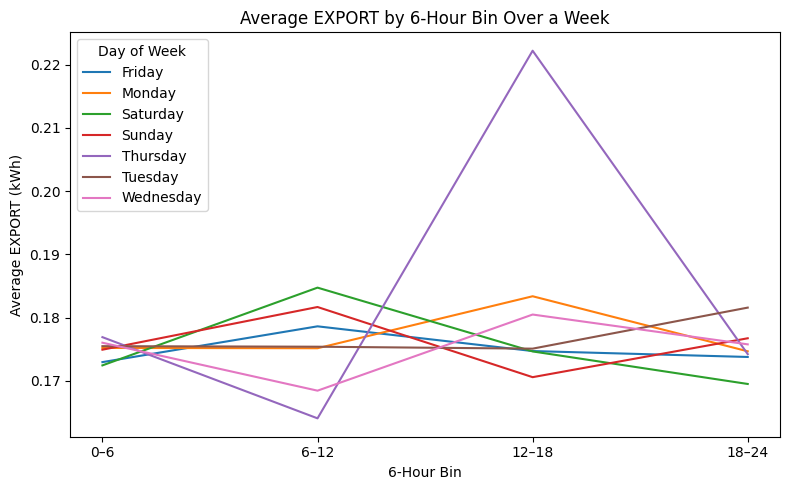

In [28]:
# Define the bins and labels for the 6-hour intervals
bins = [0, 6, 12, 18, 24]
labels = ["0–6", "6–12", "12–18", "18–24"]

# Create the 'hour_bin_6' column by cutting the 'hour_bin' column
df["hour_bin_6"] = pd.cut(df["hour_bin"], bins=bins, labels=labels, right=False, include_lowest=True)

# Extract weekday from TIMESTAMP
df["weekday"] = df["TIMESTAMP"].dt.day_name()

# Group by day and bin using the existing 'weekday' column and the new 'hour_bin_6' column
weekly_export = df.groupby(["weekday", "hour_bin_6"])["EXPORT"].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
# Use the correct column names for plotting
sns.lineplot(data=weekly_export, x="hour_bin_6", y="EXPORT", hue="weekday", palette="tab10")
plt.title("Average EXPORT by 6-Hour Bin Over a Week")
plt.xlabel("6-Hour Bin")
plt.ylabel("Average EXPORT (kWh)")
plt.legend(title="Day of Week")
plt.tight_layout()
plt.show()

b. Seasonal Trend by Month

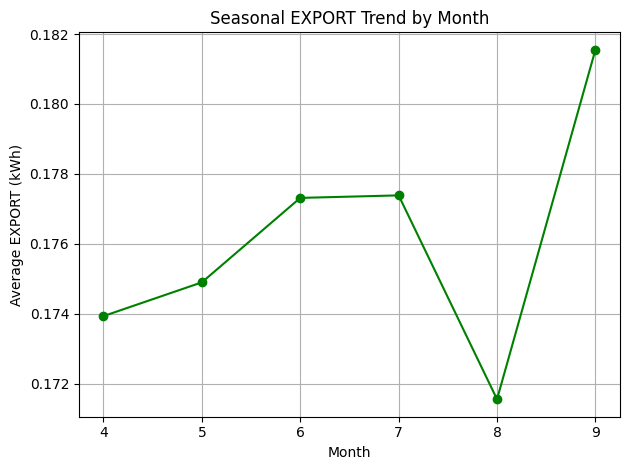

In [29]:
# Extract month from TIMESTAMP
df["month"] = df["TIMESTAMP"].dt.month

monthly_export = df.groupby("month")["EXPORT"].mean()

monthly_export.plot(kind='line', marker='o', color='green', title='Seasonal EXPORT Trend by Month')
plt.xlabel("Month")
plt.ylabel("Average EXPORT (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

4.2.2 Box/Violin Plot

a. By Branch

/tmp/ipython-input-4280362885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="BRANCH", y="EXPORT", palette="pastel")


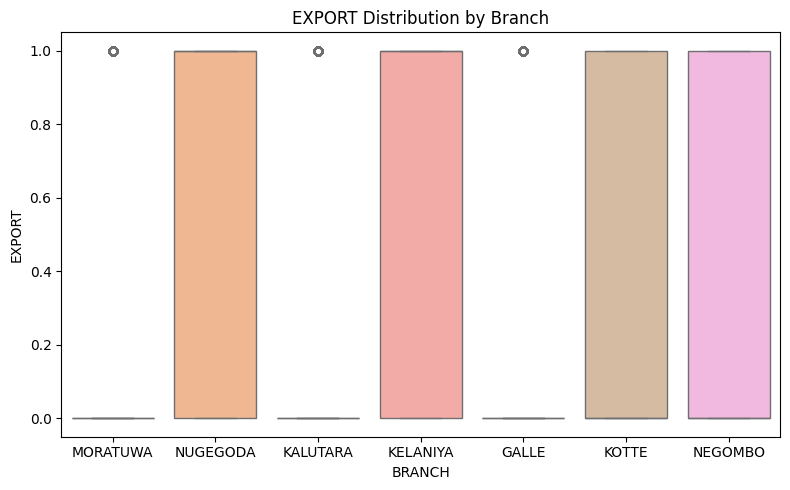

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="BRANCH", y="EXPORT", palette="pastel")
plt.title("EXPORT Distribution by Branch")
plt.tight_layout()
plt.show()

b. By Substation

/tmp/ipython-input-568161242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="substation_ID", y="EXPORT", palette="muted")


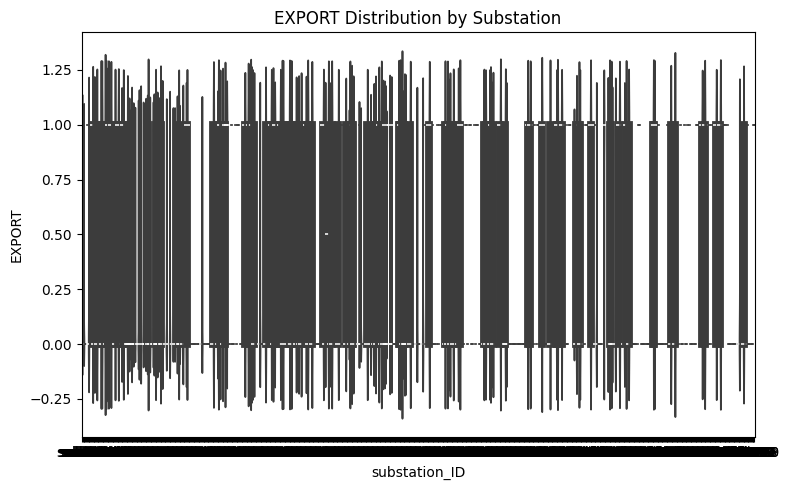

In [31]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="substation_ID", y="EXPORT", palette="muted")
plt.title("EXPORT Distribution by Substation")
plt.tight_layout()
plt.show()

4.2.3. Heatmap: Depot × 6-Hour Bin

/tmp/ipython-input-732591253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["DEPOT", "hour_bin_6"])["EXPORT"].mean().unstack()


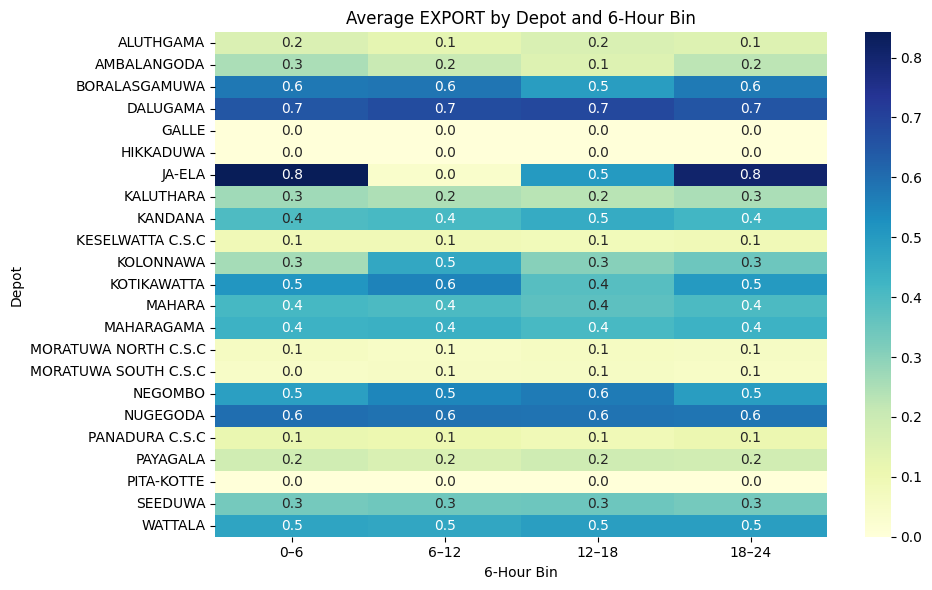

In [32]:
heatmap_data = df.groupby(["DEPOT", "hour_bin_6"])["EXPORT"].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average EXPORT by Depot and 6-Hour Bin")
plt.xlabel("6-Hour Bin")
plt.ylabel("Depot")
plt.tight_layout()
plt.show()

4.2.4. Scatter Plot: EXPORT vs SELF_CONSUMPTION

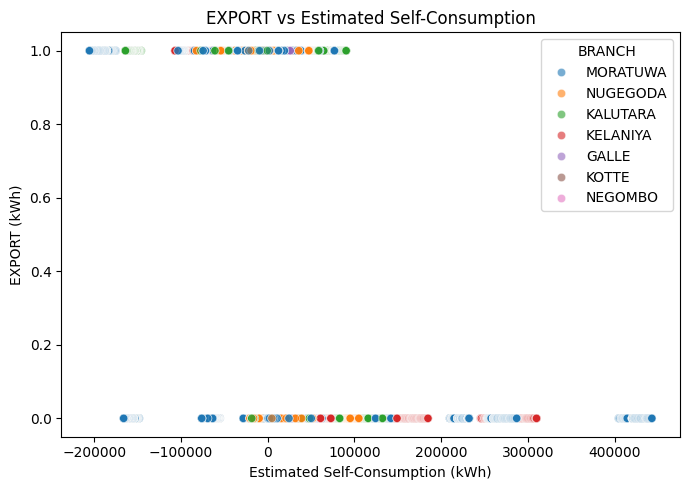

In [33]:
# Calculate Self-Consumption (estimated as Total Import - Total Export)
df["SELF_CONSUMPTION"] = df["TOTAL_IMPORT (kWh)"] - df["TOTAL_EXPORT (kWh)"]

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="SELF_CONSUMPTION", y="EXPORT", hue="BRANCH", alpha=0.6)
plt.title("EXPORT vs Estimated Self-Consumption")
plt.xlabel("Estimated Self-Consumption (kWh)")
plt.ylabel("EXPORT (kWh)")
plt.tight_layout()
plt.show()

4.2.5. Anomaly Chart: Top 0.5% EXPORT Spikes

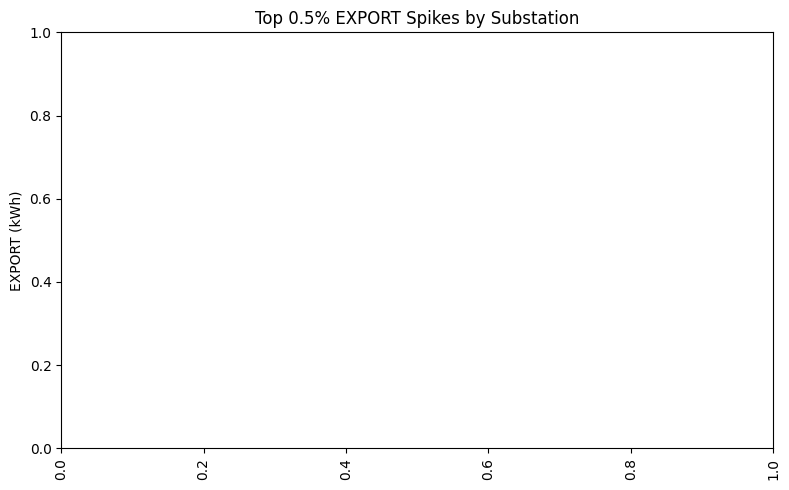

In [34]:
threshold = df["EXPORT"].astype(float).quantile(0.995)
anomalies = df[df["EXPORT"] > threshold]

plt.figure(figsize=(8,5))
sns.stripplot(data=anomalies, x="substation_ID", y="EXPORT", jitter=True, color="red", alpha=0.7)
plt.title("Top 0.5% EXPORT Spikes by Substation")
plt.ylabel("EXPORT (kWh)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

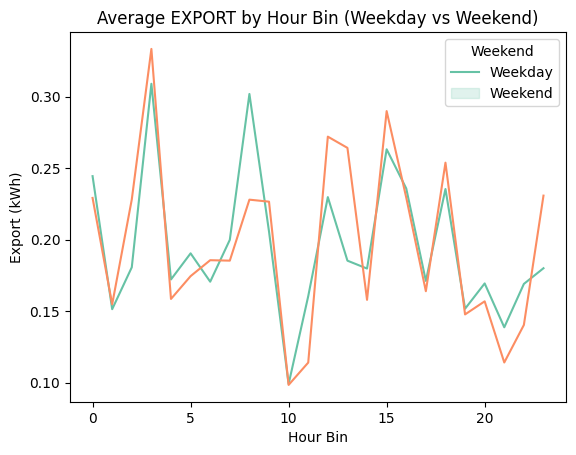

In [35]:
# Create 'is_weekend' column
df["is_weekend"] = df["TIMESTAMP"].dt.dayofweek >= 5 # Saturday and Sunday are represented as 5 and 6

# Average EXPORT by hour_bin and is_weekend
time_export = df.groupby(["hour_bin", "is_weekend"])["EXPORT"].mean().reset_index()

# Plot
plt.figure()
sns.lineplot(data=time_export, x="hour_bin", y="EXPORT", hue="is_weekend", palette="Set2")
plt.title("Average EXPORT by Hour Bin (Weekday vs Weekend)")
plt.xlabel("Hour Bin")
plt.ylabel("Export (kWh)")
plt.legend(title="Weekend", labels=["Weekday", "Weekend"])
plt.savefig("fig_export_hour_weekend.png")
plt.show()

4.3.Initial insights

4.3.1.Average Export Share by Branch

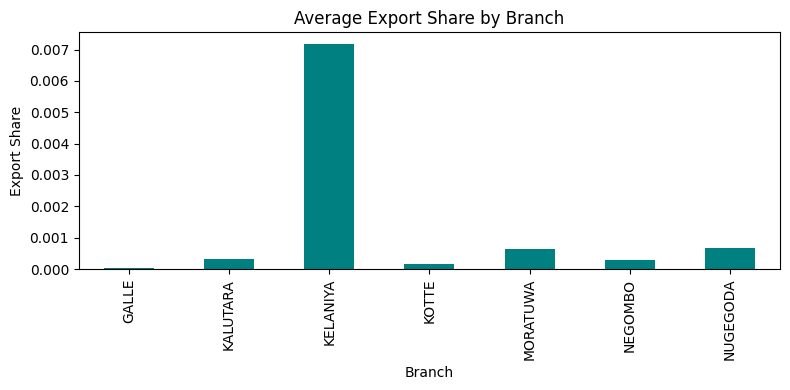

In [36]:
branch_export_share.plot(kind='bar', color='teal', figsize=(8,4), title='Average Export Share by Branch')
plt.ylabel("Export Share")
plt.xlabel("Branch")
plt.tight_layout()
plt.show()

4.3.2 Export share by substation

In [37]:
# Export share by substation
substation_export_share = df.groupby("substation_ID")["EXPORT_SHARE"].mean().sort_values(ascending=False)

# Display results
print("\n🔹 Average Export Share by Substation:")
print(substation_export_share.round(3))


🔹 Average Export Share by Substation:
substation_ID
sub84     0.380
sub578    0.091
sub162    0.070
sub105    0.058
sub657    0.045
          ...  
sub480    0.000
sub51     0.000
sub508    0.000
sub507    0.000
sub487    0.000
Name: EXPORT_SHARE, Length: 814, dtype: float64


4.3.3. Evening Export Drop (18–24 Window)


🌙 Average EXPORT during 18–24 Window by Substation:
substation_ID
sub44     0.0
sub589    0.0
sub67     0.0
sub667    0.0
sub455    0.0
         ... 
sub805    1.0
sub808    1.0
sub141    1.0
sub142    1.0
sub110    1.0
Name: EXPORT, Length: 787, dtype: float64


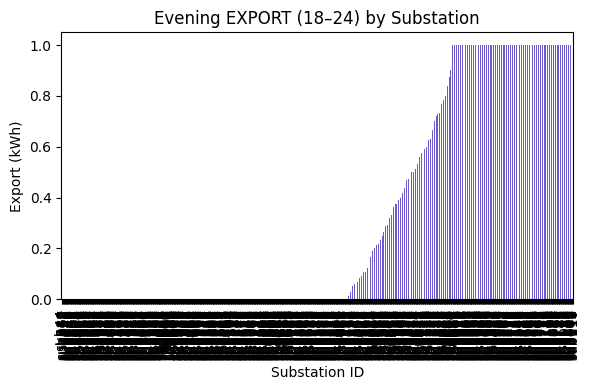

In [38]:
# Evening export drop by substation
evening_export = df[df["hour_bin"] == 18].groupby("substation_ID")["EXPORT"].mean().sort_values()

# Display results
print("\n🌙 Average EXPORT during 18–24 Window by Substation:")
print(evening_export.round(2))

evening_export.plot(kind='bar', color='slateblue', figsize=(6,4), title='Evening EXPORT (18–24) by Substation')
plt.ylabel("Export (kWh)")
plt.xlabel("Substation ID")
plt.tight_layout()
plt.show()

5.Data Analysis and Implimentation

### Analyzing Historical Export Data

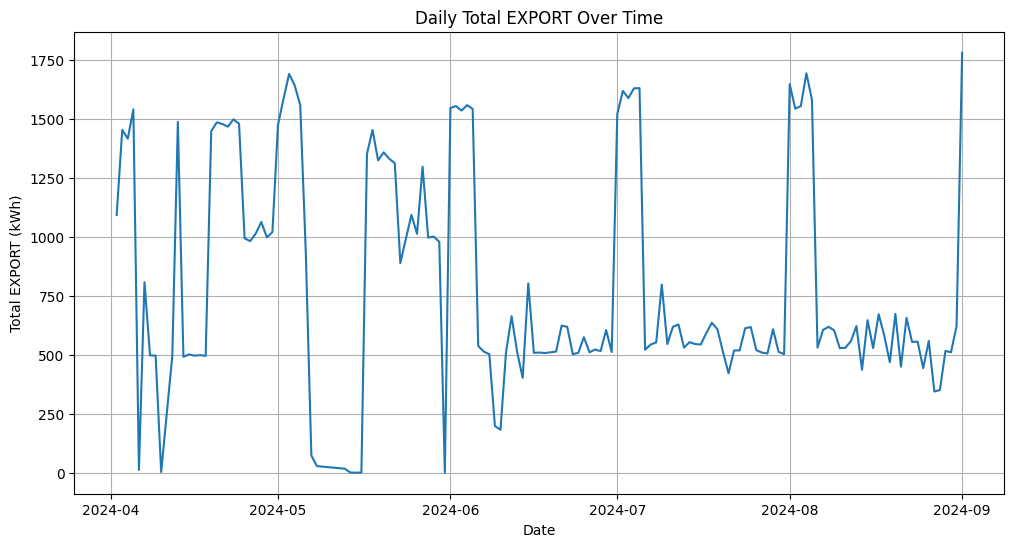

In [57]:
# Aggregate daily total export
daily_export = df.groupby("DATE")["EXPORT"].sum().reset_index()
daily_export["DATE"] = pd.to_datetime(daily_export["DATE"])
daily_export = daily_export.set_index("DATE")

# Plot daily total export
plt.figure(figsize=(12, 6))
plt.plot(daily_export.index, daily_export["EXPORT"])
plt.title("Daily Total EXPORT Over Time")
plt.xlabel("Date")
plt.ylabel("Total EXPORT (kWh)")
plt.grid(True)
plt.show()

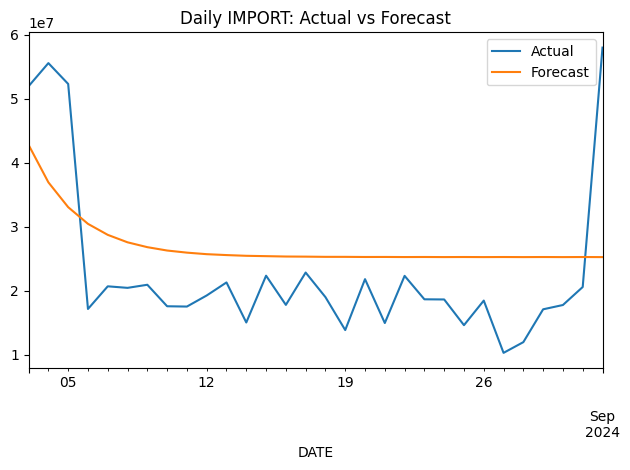

In [63]:
import matplotlib.pyplot as plt

# Use the actual test data from the 'test' DataFrame
ax = test["TOTAL_IMPORT (kWh)"].plot(label="Actual")
forecast.index = test.index # Corrected variable name
forecast.plot(ax=ax, label="Forecast") # Corrected variable name
plt.title("Daily IMPORT: Actual vs Forecast")
plt.legend(); plt.tight_layout(); plt.show()

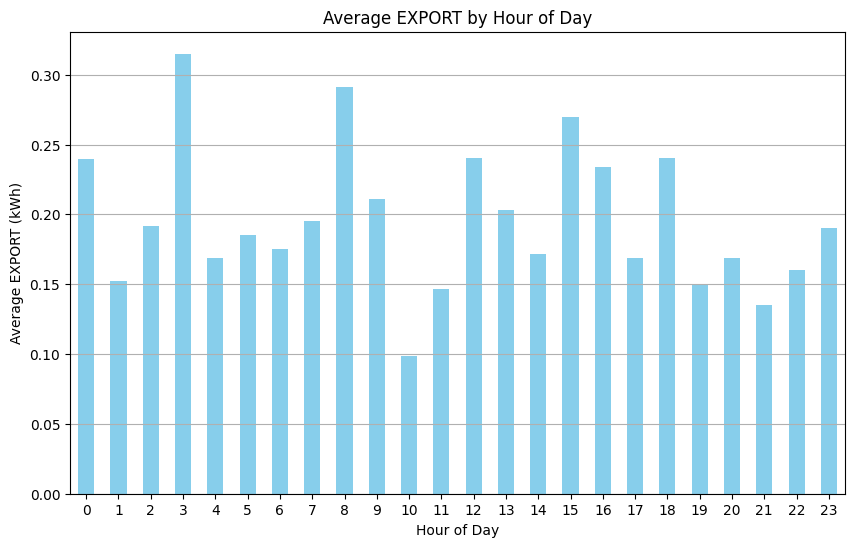

In [64]:
# Average EXPORT by hour of the day
hourly_export = df.groupby(df["TIMESTAMP"].dt.hour)["EXPORT"].mean()

# Plot average EXPORT by hour
plt.figure(figsize=(10, 6))
hourly_export.plot(kind='bar', color='skyblue')
plt.title("Average EXPORT by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average EXPORT (kWh)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

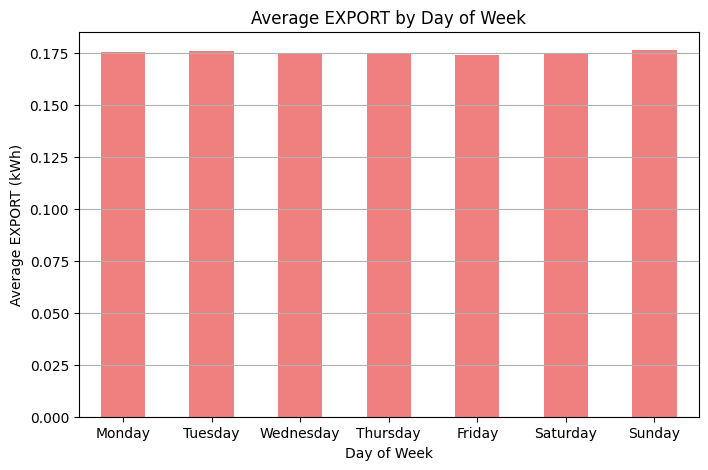

In [65]:
# Average EXPORT by day of the week
weekday_export = df.groupby(df["TIMESTAMP"].dt.dayofweek)["EXPORT"].mean()

# Map day of week numbers to names
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_export.index = weekday_export.index.map(weekday_names)

# Plot average EXPORT by day of the week
plt.figure(figsize=(8, 5))
weekday_export.plot(kind='bar', color='lightcoral')
plt.title("Average EXPORT by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average EXPORT (kWh)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [72]:
# Split data into training and testing sets for time series forecasting (using the last portion for testing)
train_size = int(len(daily_export) * 0.8)
train_export, test_export = daily_export.iloc[:train_size], daily_export.iloc[train_size:]

## Evaluation

In [52]:
# Assuming 'EXPORT' column is boolean (True if exporting, False otherwise)
# Count total customers (rows)
total_customers = len(df)

# Count current exporters (where 'EXPORT' is True)
current_exporters = df[df["EXPORT"] == True].shape[0]

# Calculate the current rate
current_rate = current_exporters / total_customers

print(f"Current adoption rate: {current_rate:.2%}")

Current adoption rate: 17.50%


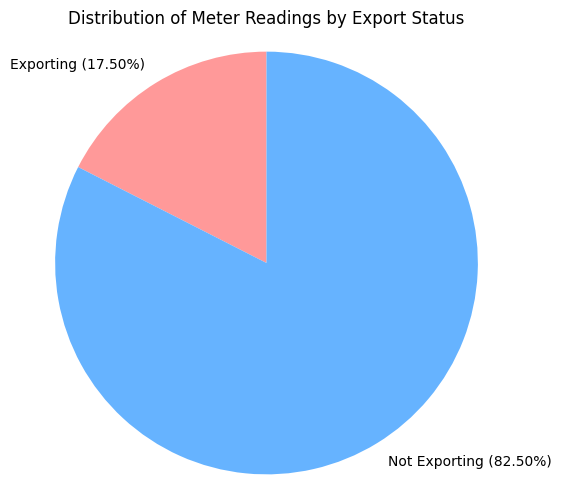

Percentage of readings with export: 17.50%


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' DataFrame is loaded and 'EXPORT' column is available and boolean or can be treated as such

# Count the occurrences of True and False in the 'EXPORT' column
export_counts = df['EXPORT'].value_counts()

# Calculate percentages
total_readings = export_counts.sum()
export_percentage = (export_counts.get(True, 0) / total_readings) * 100
no_export_percentage = (export_counts.get(False, 0) / total_readings) * 100

# Create labels for the pie chart
labels = [f'Exporting ({export_percentage:.2f}%)', f'Not Exporting ({no_export_percentage:.2f}%)']
sizes = [export_counts.get(True, 0), export_counts.get(False, 0)]
colors = ['#ff9999','#66b3ff'] # Example colors

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='', startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Meter Readings by Export Status')
plt.show()

print(f"Percentage of readings with export: {export_percentage:.2f}%")

/tmp/ipython-input-2832628598.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Adoption Rate', y='Percentage', data=df_rates, palette='viridis')


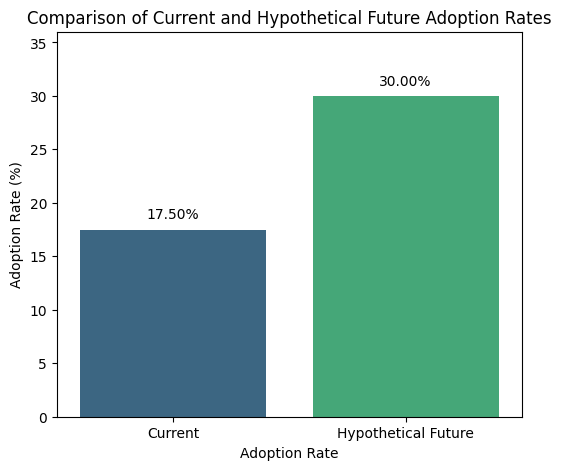

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the current and hypothetical future adoption rates
current_rate_percentage = 17.50
hypothetical_rate_percentage = 30.0

# Create a DataFrame for plotting
data = {'Adoption Rate': ['Current', 'Hypothetical Future'],
        'Percentage': [current_rate_percentage, hypothetical_rate_percentage]}
df_rates = pd.DataFrame(data)

# Create a bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x='Adoption Rate', y='Percentage', data=df_rates, palette='viridis')

# Add the percentage values on top of the bars
for index, row in df_rates.iterrows():
    plt.text(index, row['Percentage'] + 1, f"{row['Percentage']:.2f}%", color='black', ha="center")

plt.ylim(0, max(current_rate_percentage, hypothetical_rate_percentage) * 1.2) # Adjust y-axis limit for text
plt.title('Comparison of Current and Hypothetical Future Adoption Rates')
plt.ylabel('Adoption Rate (%)')
plt.show()